<a href="https://colab.research.google.com/github/dikoharyadhanto/Machine_Learning_Project/blob/main/Image_Classification_with_CNN_Classifying_Rock_Paper_Scissors_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Persiapan Dataset**

## **Menunggah dataset dengan wget command**

In [ ]:
import tensorflow as tf

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-04-27 20:53:14--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  1.68MB/s    in 4m 13s  

2021-04-27 20:57:28 (1.22 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



## **Ekstrak file rockpaperscissors.zip**

In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os

local_zip = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/ProjectML1')
zip_ref.close()

base_dir = '/tmp/ProjectML1/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

## **Membagi data ke dalam data training dan data validation dengan split-folders**

In [ ]:
!pip install split-folders
import splitfolders
splitfolders.ratio ("/tmp/ProjectML1/rockpaperscissors/rps-cv-images", 
                    output= "/tmp/ProjectML1/rockpaperscissors/", 
                    seed = 2188, ratio= (.6, .4)) # ratio validasi 40%

Copying files: 2188 files [00:00, 4015.33 files/s]


## **Mengecek jumlah data pada masing-masing data training dan validation (dengan 40% merupakan data validation)**

In [ ]:
paper_train_len = len(os.listdir('/tmp/ProjectML1/rockpaperscissors/train/paper'))
rock_train_len = len(os.listdir('/tmp/ProjectML1/rockpaperscissors/train/rock'))
scissors_train_len = len(os.listdir('/tmp/ProjectML1/rockpaperscissors/train/scissors'))

print('Total Gambar paper dalam train: ', paper_train_len)
print('Total Gambar rock dalam train: ', rock_train_len)
print('Total Gambar scissors dalam train: ', scissors_train_len)
print('Total Seluruh Gambar dalam train: ', paper_train_len + rock_train_len + scissors_train_len)

Total Gambar paper dalam train:  427
Total Gambar rock dalam train:  435
Total Gambar scissors dalam train:  450
Total Seluruh Gambar dalam train:  1312


In [ ]:
paper_val_len = len(os.listdir('/tmp/ProjectML1/rockpaperscissors/val/paper'))
rock_val_len = len(os.listdir('/tmp/ProjectML1/rockpaperscissors/val/rock'))
scissors_val_len = len(os.listdir('/tmp/ProjectML1/rockpaperscissors/val/scissors'))

print('Total Gambar paper dalam val: ', paper_val_len)
print('Total Gambar rock dalam val: ', rock_val_len)
print('Total Gambar scissors dalam val: ', scissors_val_len)
print('Total Seluruh Gambar dalam val: ', paper_val_len + rock_val_len + scissors_val_len)

Total Gambar paper dalam val:  285
Total Gambar rock dalam val:  291
Total Gambar scissors dalam val:  300
Total Seluruh Gambar dalam val:  876


## **Menampung direktori dari setiap kelas pada direktori latih dan direktori validasi ke dalam variabel.**

In [ ]:
# membuat direktori rock pada direktori data training
train_rock_dir = os.path.join(train_dir, 'rock')

# membuat direktori paper pada direktori data training
train_paper_dir = os.path.join(train_dir, 'paper')

# membuat direktori scissors pada direktori data training
train_scissors_dir = os.path.join(train_dir, 'scissors')

# membuat direktori rock pada direktori data validasi
val_rock_dir = os.path.join(val_dir, 'rock')

# membuat direktori paper pada direktori data validasi
val_paper_dir = os.path.join(val_dir, 'paper')

# membuat direktori scissors pada direktori data validasi
val_scissors_dir = os.path.join(val_dir, 'scissors')

## **Augmentasi Gambar**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    horizontal_flip = True,
                    vertical_flip = True,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    fill_mode = 'nearest')
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    horizontal_flip = True,
                    vertical_flip = True,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    fill_mode = 'nearest')

## **Mempersiapkan Data Latih dan Data Validasi Dengan Image Data Generator**

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,  # direktori data latih
    target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=16,
    # karena merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
    class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
    val_dir, # direktori data validasi
    target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=12, 
    # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
    class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


# **Membangun Arsitektur CNN**

## **Melakukan model sequential (Konvolusi, MaxPooling, Fully Connected)**

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(256, activation='relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(3, activation='softmax')
                                    ])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 15, 15, 128)      

# **Compile CNN**

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

# **Pelatihan Model**

In [ ]:
# latih model dengan model.fit 
history = model.fit(
                    train_generator,
                    steps_per_epoch=82,  # berapa batch yang akan dieksekusi pada setiap epoch
                    epochs=15, # tambahkan eposchs jika akurasi model belum optimal
                    validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
                    validation_steps=73,  # berapa batch yang akan dieksekusi pada setiap epoch
                    verbose=1)

Epoch 1/15
82/82 [==============================] - 81s 988ms/step - loss: 0.8608 - accuracy: 0.5884 - val_loss: 0.4149 - val_accuracy: 0.8151
Epoch 2/15
82/82 [==============================] - 81s 983ms/step - loss: 0.6059 - accuracy: 0.7500 - val_loss: 0.3772 - val_accuracy: 0.9258
Epoch 3/15
82/82 [==============================] - 81s 983ms/step - loss: 0.5068 - accuracy: 0.8087 - val_loss: 0.2049 - val_accuracy: 0.9486
Epoch 4/15
82/82 [==============================] - 80s 979ms/step - loss: 0.3668 - accuracy: 0.8689 - val_loss: 0.1540 - val_accuracy: 0.9692
Epoch 5/15
82/82 [==============================] - 80s 977ms/step - loss: 0.3275 - accuracy: 0.8910 - val_loss: 0.1675 - val_accuracy: 0.9532
Epoch 6/15
82/82 [==============================] - 80s 977ms/step - loss: 0.2669 - accuracy: 0.9169 - val_loss: 0.2116 - val_accuracy: 0.9292
Epoch 7/15
82/82 [==============================] - 80s 981ms/step - loss: 0.2247 - accuracy: 0.9360 - val_loss: 0.0901 - val_accuracy: 0.9806

# **Menampilkan Grafik Selama Pelatihan**

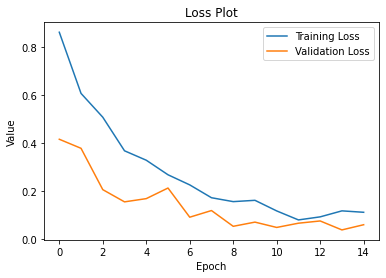

In [ ]:
from matplotlib import pyplot as plt

#loss train & validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")

plt.show()

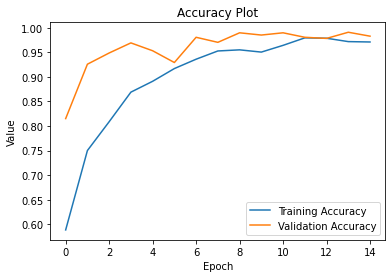

In [ ]:
#accuracy train & validation
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")

plt.show()

Saving IMG20210428064409.jpg to IMG20210428064409 (1).jpg
IMG20210428064409.jpg
0
paper


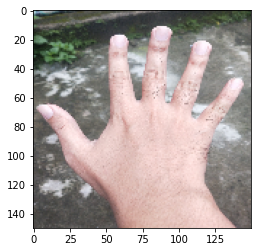

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()
pred_indices = train_generator.class_indices

for fn in uploaded.keys():
  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  
  images = np.vstack([x])
  classes = model.predict(images, batch_size=12)

  prediction = np.argmax(classes)
  print(fn)
  print(prediction)
  for key, value in pred_indices.items():
    if value == prediction:
      print(key)